# Exploring Emissions

In [3]:
### Import Libraries

# File manipulation

import os # For working with Operating System
from sys import platform # Diagnose operating system

# Analysis

import numpy as np # For working with Arrays
import pandas as pd # Data Manipulation
import geopandas as gpd # Spatial Data Manipulation

# Visualization

from pprint import pprint # Pretty Printing
import matplotlib.pyplot as plt # Basic Plotting
import contextily # Base Map Visualization

import warnings
warnings.filterwarnings('ignore') # Ignores some warnings

In [4]:
### Definitions

cwd = os.getcwd() # Current Working Directory

# Forward or back slashs for filepaths? <- Not sure here. Only know Windows & Linux

if platform == "linux" or platform == "linux2":
    slash = '/'
elif platform == 'win32':
    slash = '\\'

In [11]:
# Load Data

# Extent

path = 'CleaningData' + slash + 'Boundary' + slash + 'mpls_boundary.geojson'
mpls_boundary = gpd.read_file(path)

# Emissions

path = 'CleaningData' + slash + 'PermittedEmissions' + slash + 'mpls_emissions.csv'
mpls_emissions = pd.read_csv(path) # Load csv

emissions = gpd.GeoDataFrame(mpls_emissions, geometry=gpd.points_from_xy\
                            (mpls_emissions.x, mpls_emissions.y),
                            crs = 'epsg:26915')

emissions.head()

,id,FACILITY_NAME,FACILITY_ID,INDUSTRY_TYPE,NAICS_CODE,YEAR,POLLUTANT,LBS_EMITTED,TONS_EMITTED,x,y,geometry
0,299365,CenterPoint Energy - South,5300906,Utilities,221210,2014,CO2-equivalent,2600000.0,1300.0,477448.568212,4.970922e+06,POINT (477448.568 4970922.470)
1,411400,CenterPoint Energy - South,5300906,Utilities,221210,2017,CO2-equivalent,2574000.0,1287.0,477448.568212,4.970922e+06,POINT (477448.568 4970922.470)
2,427480,CenterPoint Energy - South,5300906,Utilities,221210,2018,CO2-equivalent,2566000.0,1283.0,477448.568212,4.970922e+06,POINT (477448.568 4970922.470)
3,520237,CenterPoint Energy - South,5300906,Utilities,221210,2020,CO2-equivalent,2580000.0,1290.0,477448.568212,4.970922e+06,POINT (477448.568 4970922.470)
4,219682,CenterPoint Energy - South,5300906,Utilities,221210,2013,CO2-equivalent,2598000.0,1299.0,477448.568212,4.970922e+06,POINT (477448.568 4970922.470)


In [19]:
# Important values

facilities = emissions.dissolve('FACILITY_ID')[['FACILITY_NAME',
                                                'INDUSTRY_TYPE','NAICS_CODE',
                                                'geometry']] # facilitIes
years = emissions['YEAR'].unique() # Years

pprint(np.sort(emissions['POLLUTANT'].unique())) # Lot's of different pollutants

array(['1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane',
       '1,1,2-Trichloroethane', '1,1-Dichloroethane',
       '1,2,3,4,6,7,8- Heptachlorodibenzodioxin',
       '1,2,3,4,6,7,8-Heptachlorodibenzofuran',
       '1,2,3,4,7,8,9-Heptachlorodibenzofuran',
       '1,2,3,4,7,8-Hexachlorodibenzodioxin',
       '1,2,3,4,7,8-Hexachlorodibenzofuran',
       '1,2,3,6,7,8-Hexachlorodibenzodioxin',
       '1,2,3,6,7,8-Hexachlorodibenzofuran',
       '1,2,3,7,8,9-Hexachlorodibenzodioxin',
       '1,2,3,7,8,9-Hexachlorodibenzofuran',
       '1,2,3,7,8- Pentachlordibenzofuran',
       '1,2,3,7,8- Pentachlorodibenzodioxin', '1,2,4-Trichlorobenzene',
       '1,2,4-Trimethylbenzene', '1,2-Dibromoethane',
       '1,2-Dichloroethane', '1,3,5-Trimethylbenzene', '1,3-Butadiene',
       '1,3-Dichloropropene', '1,4-Dichlorobenzene', '1,4-Dioxane',
       '2,2,4-Trimethylpentane', '2,3,4,6,7,8-Hexachlorodibenzofuran',
       '2,3,4,7,8- Pentachlordibenzofuran',
       '2,3,7,8-Tetrachlorodibenzo-P-Diox

Years that dioxin emissions reported:  [2008 2011 2014 2017 2020]
Locations that reported:  ['Abbott Northwestern Hospital' 'Hennepin Energy Recovery Center'
 'Covanta Hennepin Energy Resource Co LP'
 'G&K Services - Minneapolis Industrial' 'University of MN - Twin Cities'
 'Hennepin County Energy Center' 'NRG Energy Center Minneapolis'
 'NRG Energy Center Minneapolis LLC' 'GAF Materials Corp'
 'Aaron Carlson Corp' 'Consolidated Container Co'
 'Xcel Energy - Riverside Generating Plant']


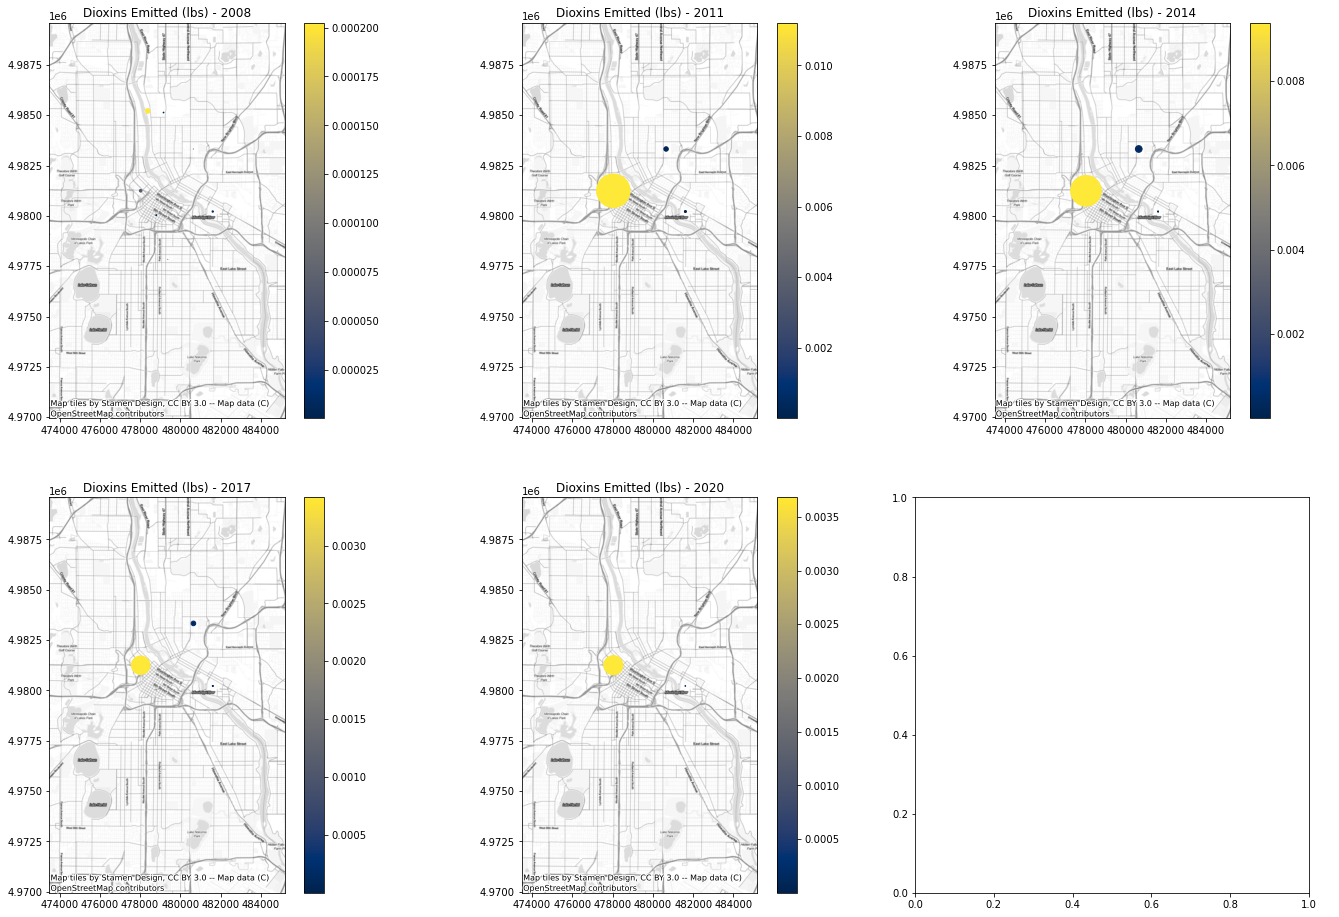

In [78]:
# Let's start with dioxyns

dioxins = emissions.query('POLLUTANT.str.contains("dioxin") or POLLUTANT.str.contains("Dioxin")', 
                          engine='python')[['FACILITY_NAME', 'YEAR', 'POLLUTANT', 'LBS_EMITTED','geometry']]

years = np.sort(dioxins.YEAR.unique())

facilities = dioxins.FACILITY_NAME.unique()

print('Years that dioxin emissions reported: ', years)

print('Locations that reported: ', facilities)

# dioxin_gp = dioxins.groupby(['YEAR', 'FACILITY_NAME']).sum() # This should be done

f, axs = plt.subplots(2, 3, figsize = (24, 16))

for i, ax in enumerate(axs.flat):
    
    if i < 5:
    
        year = years[i]
        
        data = dioxins[dioxins['YEAR']==year]
        
        title = 'Dioxins Emitted (lbs) - ' + str(year)
        
        
        mpls_boundary.plot(ax = ax, edgecolor='black', facecolor='white',
               alpha = .1)

        data.plot('LBS_EMITTED',
                     legend = True,
                    cmap = 'cividis',
                     ax = ax,
                     s = data['LBS_EMITTED']*100000
                    )


        contextily.add_basemap(ax = ax, 
                       crs = mpls_boundary.crs, 
                       source = contextily.providers.Stamen.TonerLite
                      )
        
        ax.set_title(title)

        
        # It appears that HERC that emits dioxins on a different scale than others, but these are small values

In [ ]:
# Volatile Organic Compounds, PM Primary, PM10 Primary, and PM2.5 Primary



In [33]:
emissions.query('POLLUTANT.str.contains("dioxin")', engine='python')

,id,FACILITY_NAME,FACILITY_ID,INDUSTRY_TYPE,NAICS_CODE,YEAR,POLLUTANT,LBS_EMITTED,TONS_EMITTED,x,y,geometry
3074,132644,Abbott Northwestern Hospital,5300061,Other,62211,2011,"1,2,3,4,6,7,8- Heptachlorodibenzodioxin",1.258540e-08,6.292700e-12,479373.258804,4.977840e+06,POINT (479373.259 4977840.157)
3162,132649,Abbott Northwestern Hospital,5300061,Other,62211,2011,"1,2,3,7,8,9-Hexachlorodibenzodioxin",3.492160e-09,1.746080e-12,479373.258804,4.977840e+06,POINT (479373.259 4977840.157)
3206,132665,Abbott Northwestern Hospital,5300061,Other,62211,2011,"1,2,3,7,8- Pentachlorodibenzodioxin",2.044200e-09,1.022100e-12,479373.258804,4.977840e+06,POINT (479373.259 4977840.157)
3209,132663,Abbott Northwestern Hospital,5300061,Other,62211,2011,"Octachlorodibenzodioxins, All Isomers",1.032680e-08,5.163400e-12,479373.258804,4.977840e+06,POINT (479373.259 4977840.157)
7751,132647,Abbott Northwestern Hospital,5300061,Other,62211,2011,"1,2,3,4,7,8-Hexachlorodibenzodioxin",4.493620e-09,2.246810e-12,479373.258804,4.977840e+06,POINT (479373.259 4977840.157)
...,...,...,...,...,...,...,...,...,...,...,...,...
28074,360131,Aaron Carlson Corp,5300796,Manufacturing,321918,2017,"1,2,3,7,8- Pentachlorodibenzodioxin",5.192000e-08,2.596000e-11,480652.938768,4.983329e+06,POINT (480652.939 4983328.672)
28102,360106,Aaron Carlson Corp,5300796,Manufacturing,321918,2017,"1,2,3,7,8,9-Hexachlorodibenzodioxin",2.122000e-07,1.061000e-10,480652.938768,4.983329e+06,POINT (480652.939 4983328.672)
28116,360100,Aaron Carlson Corp,5300796,Manufacturing,321918,2017,"1,2,3,4,6,7,8- Heptachlorodibenzodioxin",4.646000e-07,2.323000e-10,480652.938768,4.983329e+06,POINT (480652.939 4983328.672)
28120,360104,Aaron Carlson Corp,5300796,Manufacturing,321918,2017,"1,2,3,4,7,8-Hexachlorodibenzodioxin",7.628000e-08,3.814000e-11,480652.938768,4.983329e+06,POINT (480652.939 4983328.672)


In [ ]:
# ## Query

# criteria = focus.loc[focus['Pollutant_gp'] == 'Criteria']
# toxics = focus.loc[focus['Pollutant_gp'] == 'Air toxic']

# ### Pollutants of interest

# crit_pollutants = criteria['Pollutant'].unique()
# toxic_pollutants = toxics['Pollutant'].unique()

# print('Criteria Pollutants', crit_pollutants) # Not too many
# # print(toxic_pollutants) # Lots! - I know the benchmarks for Benzene and Naphthalene? Part of Greater VOC Family

In [ ]:
# ## Maybe sum them up?

# # Group by Year, facility, pollutant_gp
# tox_gp = toxics.groupby(['Year','Facility_ID', 'Pollutant_gp'])

# toxic_lbs = tox_gp.sum()

# # This is where I'll stop for now